In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from GetAprilTrainTestData import GetAprilTrainTestData

In [123]:
X, y = GetAprilTrainTestData()

7956 7956


In [124]:
# Now need to one hot encode all the stuff in X that is categorical. 
X = pd.get_dummies(X)
print("Shape", X.shape)

Shape (7956, 2743)


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
print(len(X_train), len(y_train), len(X_test), len(y_test))

5967 5967 1989 1989


In [145]:
# Scale the data. This may not be necessary for linear regressions, but will be if I go to some other scheme
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Tranform all of the data based on the scaler fit calculated above
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [148]:
print(len(X_train_scaled), len(y_train_scaled), len(X_test_scaled), len(y_test_scaled))
print("Number of features = ", len(X_train_scaled[0]))
print(X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test_scaled.shape)

5967 5967 1989 1989
Number of features =  2743
(5967, 2743) (5967, 1) (1989, 2743) (1989, 1)


In [179]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100), max_iter=2000)

# Fitting our model with all of our features in X
model.fit(X_train_scaled, np.concatenate(y_train_scaled, axis=0))
score = model.score(X_test_scaled, np.concatenate(y_test_scaled, axis=0))
print(f"R2 Score: {score}")

R2 Score: 0.4949262071098176


In [175]:
# len(X_test_scaled), len(X_test_scaled[0])
model.score(X_test_scaled, y_test_scaled)

0.509047327316177

In [176]:
predictions= model.predict(X_test_scaled)

In [177]:
X_train_recovered = X_scaler.inverse_transform(X_train_scaled)
X_test_recovered = X_scaler.inverse_transform(X_test_scaled)
y_train_recovered = y_scaler.inverse_transform(y_train_scaled)
y_test_recovered = y_scaler.inverse_transform(y_test_scaled)
predictions_recovered = y_scaler.inverse_transform(predictions)

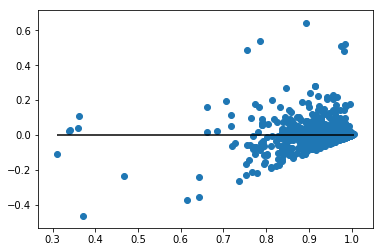

In [178]:
plt.scatter(predictions_recovered, predictions_recovered - np.concatenate(y_test_recovered, axis=0))
plt.hlines(y=0, xmin=predictions_recovered.min(), xmax=predictions_recovered.max())
plt.show()

array([[8.00000000e+00, 3.20000000e+01, 3.92000000e+02, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00],
       [2.98540000e+03, 3.50000000e+01, 1.64000000e+02, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00],
       [1.89000000e+01, 4.20000000e+02, 9.59000000e+02, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00],
       ...,
       [3.38000000e+01, 4.58000000e+02, 2.03200000e+03, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00],
       [5.80000000e+00, 2.32000000e+02, 2.88000000e+03, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00],
       [1.10000000e+01, 4.19000000e+02, 1.79200000e+03, ...,
        0.00000000e+00, 2.16840434e-19, 1.00000000e+00]])

In [190]:
out_df=pd.DataFrame(X_test_recovered)
out_df.columns=X.columns
out_df["MSYE"] = list(np.concatenate(y_test_recovered, axis=0))
out_df["Predictions"] = predictions_recovered
out_df.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl76_2,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1,LOTSCREENTYPE_FIRST_PASS,MSYE,Predictions
0,8.0,32.0,392.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.844,0.881982
1,2985.4,35.0,164.0,1.0,1.0,1.0,1.0,1.0,1.110223e-16,1.000,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.817,0.802369
2,18.9,420.0,959.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.998,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.996,0.991733
3,26.3,1157.0,14103.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.949,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.995,0.998975
4,2.0,159.0,1439.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.999,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.999,0.987218


In [192]:
out_df.to_csv("data/product_test_data_MLP.csv")